# Demonstration of shifty.py's "known" module
 - 2020/12/10
 - Payne & Alexandersen
 
There is a "Known" class
 - This handles both data-downloads and operations associated with recovering the signal for a known object.
 - The known object can be specified using name or using orbital elements. 
 - Objects specified by name are looked up in JPL Horizons. 
 - Objects specified by orbit are calculated locally. [Not implemented]

This notebook:
 - Demonstrates the working functionality. 

#### Import statements 

In [1]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import glob 
import importlib

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth

# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import known
importlib.reload(known)

<module 'known' from '/home/mikea/GitHub/shifty/shifty/known.py'>

## High level functionality
Here we'll discuss the Known class and the method get_known_RADEC.

### Instantiate empty Known object
Instantiate a boring empty object, with no data about real objects.

In [ ]:
importlib.reload(known)

# creation of Known object
K = known.Known()

# there is just one instantiated variable:
print(K.__dict__)

# This lists the methods available inside the class. 
print(K.__doc__)

### Instantiate Known object, then use get_known_RADEC
Instantiate a boring empty object, with no data about real objects.

In [ ]:
importlib.reload(known)

times = np.arange(2458436.5, 2458436.6, 0.02)

# creation of Known object
K = known.Known()
print(K.get_known_RADEC.__doc__)
K.get_known_RADEC(object_name='Sedna', obs_code='500@-95', times=times,)

print('The times, obs_code, RA and Dec variables now exist inside the object:')
print(K.__dict__.keys())
print()

for t, r, d in zip(K.times, K.RA, K.Dec):
    print(t, r, d)

### Instantiate Known object with an object name
Instantiate using an object name, array of times and an obs_code.
Known will automatically fetch RA and Dec from JPL Horizons at the specified times:

In [ ]:
importlib.reload(known)

times = np.arange(2458436.5, 2458436.6, 0.02)

# creation of Known object
K = known.Known(object_name='Sedna', obs_code='500@-95', times=times)
print('The times, obs_code, RA and Dec variables now exist inside the object:')
print(K.__dict__.keys())
print()

for t, r, d in zip(K.times, K.RA, K.Dec):
    print(t, r, d)

# .
# .
# .
## Low level functionality
These two functions will be demonstrated here:
        - _get_object_RADEC_from_horizons()
        - _get_object_XYZ_from_horizons()
### _get_object_RADEC_from_horizons()

In [ ]:
importlib.reload(known)

times = np.arange(2458436.5, 2458436.6, 0.02)

K = known.Known()
print(K._get_object_RADEC_from_horizons.__doc__)
K._get_object_RADEC_from_horizons(obs_code='500@-95', times=times,
                                  object_name='Sedna')
print('The RA and Dec variables now exist inside the object:')
print(K.__dict__.keys())
print()

for t, r, d in zip(times, K.RA, K.Dec):
    print(t, r, d)

print('\n'
      '_get_object_RADEC_from_horizons is used by get_known_RADEC \n'
      'if "object_name" is supplied.')

### _get_object_XYZ_from_horizons()
This gets the cartesian vector instead of the RA/Dec.
This isn't actually used anywhere yet. 

In [93]:
importlib.reload(known)

times = np.arange(2458436.5, 2458436.6, 0.02)

K = known.Known()
print(K._get_object_XYZ_from_horizons.__doc__)
K._get_object_XYZ_from_horizons(times=times,
                                object_name='Sedna')
print('The times, obs_code, RA and Dec variables now exist inside the object:')
print(K.__dict__.keys())
print()

for t, xyz in zip(times, K.XYZ.T):
    x, y, z = xyz
    print(t, x, y, z)

print('\n'
      '_get_object_XYZ_from_horizons is not really used yet')


        Query horizons for the BARYCENTRIC VECTOR of a
        *known object* at a sequence of times.
        input:
        object_name - string
        times       - array
        object_type - string
                    - Usually the default "smallbody" is fine, 
                      but for some objects, like natsats, it's neccessary.
        plane       - string
                    - 'earth' = equatorial
                    - 'ecliptic' = ecliptic
        
The times, obs_code, RA and Dec variables now exist inside the object:
dict_keys(['local_dir', 'XYZ'])

2458436.5 45.78427075187707 70.63176773278133 11.4972416392049
2458436.52 45.78422226042723 70.63177902077945 11.49725043822404
2458436.54 45.78417376896854 70.63179030876395 11.49725923724096
2458436.56 45.784125277501 70.63180159673477 11.49726803625566
2458436.58 45.78407678602461 70.63181288469194 11.49727683526814
2458436.6 45.78402829453938 70.63182417263548 11.49728563427839

_get_object_XYZ_from_horizons is not reall

# .
# .
# .
## Functionality meant to ease development ONLY!
##### Use Known or known to look at positions of sedna
 - While developing, we'll want to know the position of Sedna and 101583 as a function of time
 - The JPL Horizons ephemerides during Sector-5 are located in dev_data as a convenience. 
 
### _interpolate_radec_for_sedna, etc.

In [ ]:
importlib.reload(known)
K = known.Known()

# These are the values from JPL at hourly intervals
JD_, RA_, Dec_  = K._radec_for_sedna()
for t, r, d in zip(JD_[:2], RA_[:2], Dec_[:2]):
    print(t, r, d)
print()

# These are interpolated values at arbitrary times 
times = np.arange(2458436.5, 2458436.6, 0.02)
RA_, Dec_ = K._interpolate_radec_for_sedna(times)
for t, r, d in zip(times, RA_, Dec_):
    print(t, r, d)
print() 


Under the hood, K._radec_for_sedna() and K._interpolate_radec_for_sedna() just calls a couple of functions,
so the above can also be done without having a Known object for identical results:

In [ ]:
importlib.reload(known)

# These are the values from JPL at hourly intervals, without a known object:
JD_, RA_, Dec_ = known._radec_from_file('Sedna')
for t, r, d in zip(JD_[:2], RA_[:2], Dec_[:2]):
    print(t, r, d)
print()

# These are interpolated values at arbitrary times 
times = np.arange(2458436.5, 2458436.6, 0.02)
RA_, Dec_ = known._interpolate_radec(times, known._radec_from_file('Sedna'))
for t, r, d in zip(times, RA_, Dec_):
    print(t, r, d)
print()

In [ ]:
# Some notes on which camera/ccd/etc we expect Sedna to be in 
# - These came from inputing 57.136 7.6549 into lightkurve's tess-cut/tess-search function 
camera = 1 
ccd = 4
col, row = 1550, 1101

Below the accuracty of the interpolation is shown:

In [ ]:
# Only run this cell when neccessary, as it is a large query to Horizons
times = np.arange(2458436.5, 2458436.6, 0.002)
K = known.Known(object_name='Sedna', obs_code='500@-95', times=times)

In [ ]:
plt.plot(times, K.Dec, ',', label='Horizons')

JD_h, RA_h, Dec_h = known._radec_from_file('Sedna')
plt.plot(JD_h, Dec_h, '.', label='Hourly')

RA_, Dec_ = known._interpolate_radec(times, known._radec_from_file('Sedna'))
plt.plot(times, Dec_, ',', label='Interpolated')
plt.ylim([7.65474, 7.65502])
plt.xlim([2458436.5, 2458436.6])
plt.xlabel('Julian Date')
plt.ylabel('Dec [deg]')
plt.legend(loc='best')

In [ ]:
plt.figure()
plt.plot(times, (K.Dec-Dec_) * 3600 * 1000, '.')
plt.xlabel('Julian Date')
plt.ylabel('Horizons - Interpolated [milli-arc-second]')

In [99]:
### _interp_xyz etc

In [96]:
importlib.reload(known)
JD_, X_, Y_, Z_ = known._xyz_from_file()

(45.7078862734201, 45.78790810799406, 11.496581837781482, 11.511097469096667)

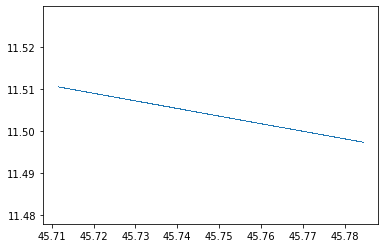

In [97]:
plt.plot(X_, Z_, ',')
plt.axis('equal')

In [98]:
K = known.Known()
times = np.arange(2458436.5, 2458436.6, 0.01)
K._get_object_XYZ_from_horizons(times=times, object_name='Sedna')

In [100]:
import dev_tools

Help on function _radec_interp in module dev_tools:

_radec_interp(times, inputJRD)
    Interpolate the RA & Dec at the input times.
    input:
    times - array of times for output
    inputJRD - tuple of JD_, RA_ and Dec_ of data for interpolation

